In [1]:
#Importing libraries
import numpy as np
import pandas as pd

In [9]:
#address for the data
data_address = "/Users/nickelcobalt/lhl/projects/LHL-DS-Project2-Python/data/"

# 1.0 Importing City Bikes, Foursquare and Yelp Dataframes

#### City Bikes DF

In [10]:
citybikes_df = pd.read_pickle(f"{data_address}citybikes_df.pkl") #Importing city bikes df

In [11]:
citybikes_df.head()

bike_id   bike_lat   bike_lon
0  fb337bbed72e2be090071e199899b2be  43.665269 -79.319796
1  4ff88d5880e71aa40d34cfe5d09b0ca7  43.671420 -79.445947
2  a09c67c0b419654d907c9134b108e328  43.666224 -79.317693
3  d6a9daee68070a8b106cfb598d81308c  43.653236 -79.376716
4  8f8af40d9388c8a3962559e8681d3db7  43.663722 -79.380288

#### Foursquare DF

In [12]:
fs_df = pd.read_pickle(f"{data_address}fs_df.pkl") #Importing foursquare df

In [13]:
fs_df.head()

fs_id                     fs_name fs_category  \
0  4ad9ebdcf964a520e61b21e3                 Chick-N-Joy       Diner   
1  4bb2941814cfd13a8e2915ab     Morning Star Restaurant       Diner   
2  4b4d2e7bf964a52089cd26e3                      Subway        Deli   
3  529e7344498e18bff5e60191              The Carbon Bar  Restaurant   
4  533d629b498e7452f4a50bda  North of Brooklyn Pizzeria    Pizzeria   

   fs_latitude  fs_longitude  fs_distance  
0    43.665121    -79.321347          129  
1    43.669161    -79.442176          370  
2    43.666113    -79.316921           64  
3    43.653229    -79.374868          153  
4    43.664407    -79.380200           73

#### Yelp DF

In [14]:
yelp_df = pd.read_pickle(f"{data_address}yelp_df.pkl") #Importing Yelp df

In [15]:
yelp_df.head()

yelp_id        yelp_name yelp_category  yelp_longitude  \
0  Ohengzi4viLEXqhK50aLxg         Jaclyn's     Caribbean        43.66627   
1  a-Mo7Ipu_c5y21mmg0-F7g             Agio       Italian        43.67599   
2  Ohengzi4viLEXqhK50aLxg         Jaclyn's     Caribbean        43.66627   
3  qekAZVcOoJjMBnN5rJ_4fQ  The Rabbit Hole    Gastropubs        43.64995   
4  saijdv-vXJrvsCfvr7SZOw          Katsuya      Japanese        43.65995   

   yelp_latitude  yelp_distance  yelp_ratings  
0      -79.31802     172.375134           4.5  
1      -79.45066     646.471211           4.5  
2      -79.31802      29.257263           4.5  
3      -79.37976     426.288752           4.0  
4      -79.37882     432.975108           4.5

## Selecting first 450 rows from City Bikes and Foursqare DF

In [8]:
citybikes_df = citybikes_df.iloc[:450] #Selecting the first 450 rows of the citybikes df

In [9]:
fs_df = fs_df.iloc[:450] #Selecting the first 450 rows of the foursquare df

# 2.0 Joining All Dataframes

1. As mentioned in the comments on yelp_foursquare_EDA.ipynb, the three dataframes that will be used here will be limited for 450 rows.
2. There will be no need to match anything here, as mentioned in the previous notebook, the first row of foursquarea nd yelp df shall correspond to the first row of citybikes_df. Therefore, the first 450 rows of citybikes_df should match the first 450 rows of foursquare and yelp.
3. Regarding duplicates, there will be duplicate restaurants on foursquare and yelp restaurants because these restaurants are the nearest business to the bike station that was used as a reference. 
4. If you would look closely on the SQL querry, I dealt with the duplicates and added constraints to the table. 
5. Can you please point out on the missing values?

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [10]:
#joining all df
df = pd.concat([citybikes_df, fs_df, yelp_df], axis=1)

In [11]:
df.head()

bike_id   bike_lat   bike_lon  \
0  fb337bbed72e2be090071e199899b2be  43.665269 -79.319796   
1  4ff88d5880e71aa40d34cfe5d09b0ca7  43.671420 -79.445947   
2  a09c67c0b419654d907c9134b108e328  43.666224 -79.317693   
3  d6a9daee68070a8b106cfb598d81308c  43.653236 -79.376716   
4  8f8af40d9388c8a3962559e8681d3db7  43.663722 -79.380288   

                      fs_id                     fs_name fs_category  \
0  4ad9ebdcf964a520e61b21e3                 Chick-N-Joy       Diner   
1  4bb2941814cfd13a8e2915ab     Morning Star Restaurant       Diner   
2  4b4d2e7bf964a52089cd26e3                      Subway        Deli   
3  529e7344498e18bff5e60191              The Carbon Bar  Restaurant   
4  533d629b498e7452f4a50bda  North of Brooklyn Pizzeria    Pizzeria   

   fs_latitude  fs_longitude  fs_distance                 yelp_id  \
0    43.665121    -79.321347          129  Ohengzi4viLEXqhK50aLxg   
1    43.669161    -79.442176          370  a-Mo7Ipu_c5y21mmg0-F7g   
2    43.666113    -79.316921           64  Ohengzi4viLEXqhK50aLxg   
3    43.653229    -79.374868          153  qekAZVcOoJjMBnN5rJ_4fQ   
4    43.664407    -79.380200           73  saijdv-vXJrvsCfvr7SZOw   

         yelp_name yelp_category  yelp_longitude  yelp_latitude  \
0         Jaclyn's     Caribbean        43.66627      -79.31802   
1             Agio       Italian        43.67599      -79.45066   
2         Jaclyn's     Caribbean        43.66627      -79.31802   
3  The Rabbit Hole    Gastropubs        43.64995      -79.37976   
4          Katsuya      Japanese        43.65995      -79.37882   

   yelp_distance  yelp_ratings  
0     172.375134           4.5  
1     646.471211           4.5  
2      29.257263           4.5  
3     426.288752           4.0  
4     432.975108           4.5

# 3.0 EDA

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [12]:
import matplotlib.pyplot as plt

### 3.1 Top Categories Search Result

In [13]:
#Top 10 Categories Result for Foursquare and Yelp
fs_category_top10 = df["fs_category"].value_counts().head(10)
yelp_category_top10 = df["yelp_category"].value_counts().head(10)

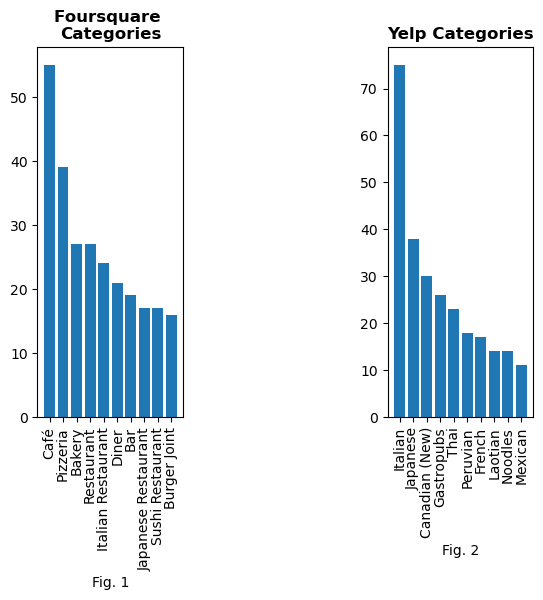

In [14]:
#Foursquare plot
plt.subplot(1,3,1)
plt.bar(fs_category_top10.index, fs_category_top10.values)
plt.title("Foursquare \nCategories", weight="bold", loc="center")
plt.xlabel("Fig. 1")
plt.xticks(rotation=90)

#Yelp Plot
plt.subplot(1,3,3)
plt.bar(yelp_category_top10.index, yelp_category_top10.values)
plt.title("Yelp Categories", weight="bold")
plt.xlabel("Fig. 2")
plt.xticks(rotation=90)

plt.show()

1. Based on the bar figures above, the result from Foursquare API call is more detailed on what the restaurant offers while the results from Yelp API call is more on the general type of restaurant.

### 3.2 Proximity to the Bike Location

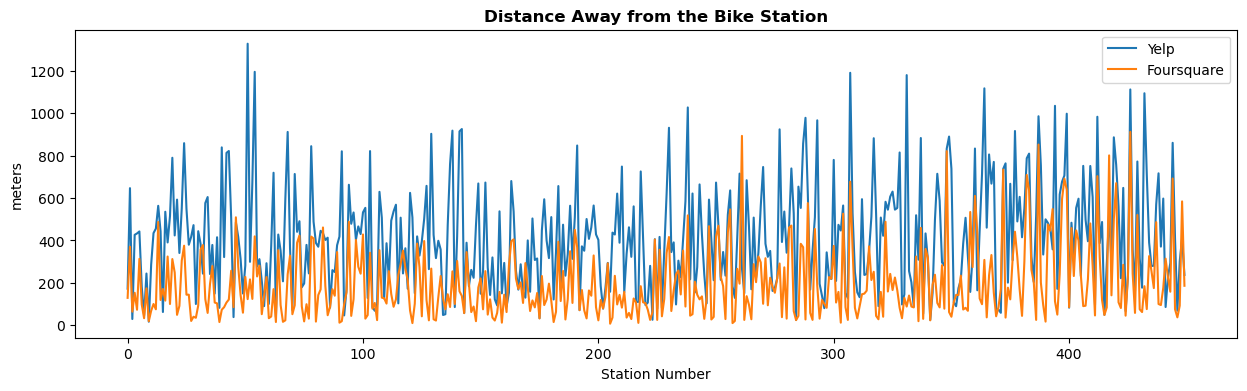

In [15]:
station = [i for i in range(len(df))] #Generate station number
fs_distance = df["fs_distance"] #fs restaurants distance from the bike station
yelp_distance = df["yelp_distance"] #yelp restaurants distance from the bike station


#Distance Away from the Bike Station plot
plt.figure(figsize=(15,4))
plt.plot(station, yelp_distance, label="Yelp")
plt.plot(station, fs_distance, label="Foursquare")
plt.title("Distance Away from the Bike Station", weight="bold")
plt.ylabel("meters")
plt.xlabel("Station Number")

plt.legend()


plt.show()

1. The restaurants from Foursquare API call are generally closer to the bike station than the restaurants that showed up on Yelp API call.
2. The distance of restaurants from Yelp are as likely as twice as farther from the bike station compared to the restaurants from Foursquare API call.

# 4.0 Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [16]:
citybikes_df

bike_id   bike_lat   bike_lon
0    fb337bbed72e2be090071e199899b2be  43.665269 -79.319796
1    4ff88d5880e71aa40d34cfe5d09b0ca7  43.671420 -79.445947
2    a09c67c0b419654d907c9134b108e328  43.666224 -79.317693
3    d6a9daee68070a8b106cfb598d81308c  43.653236 -79.376716
4    8f8af40d9388c8a3962559e8681d3db7  43.663722 -79.380288
..                                ...        ...        ...
445  e473bffc39f79fdd42e27583ccbe0709  43.654124 -79.463639
446  3d71c9ff5bcbaad794a49115e11786e3  43.680207 -79.339243
447  fea3f9dfbcc18225728f10913c5d3d5b  43.658988 -79.438715
448  f3a880cb5277285662d2d68f5523488d  43.674122 -79.435221
449  844d02b2b7dfdabf7bd044c3edf050d5  43.646993 -79.370666

[450 rows x 3 columns]

Look at the data before and after the join to validate your data.

In [17]:
db_columns_citybikes = list(citybikes_df.columns)
db_columns_fs = list(fs_df.columns)
db_columns_yelp = list(yelp_df.columns)

In [18]:
#City Bikes Columns
db_columns_citybikes

['bike_id', 'bike_lat', 'bike_lon']

In [19]:
#Foursquare Columns
db_columns_fs

['fs_id',
 'fs_name',
 'fs_category',
 'fs_latitude',
 'fs_longitude',
 'fs_distance']

In [20]:
#Yelp Columns
db_columns_yelp

['yelp_id',
 'yelp_name',
 'yelp_category',
 'yelp_longitude',
 'yelp_latitude',
 'yelp_distance',
 'yelp_ratings']

### 4.2 Filtering all unique rows 

In [21]:
fs_df_unique_index = fs_df["fs_id"].drop_duplicates().index
yelp_df_unique_index = yelp_df["yelp_id"].drop_duplicates().index
citybikes_df_unique_index = citybikes_df["bike_id"].drop_duplicates().index

#### City Bikes Stations Unique Rows

In [22]:
citybikes_df_unique = citybikes_df.loc[citybikes_df_unique_index]
citybikes_df_unique.head()

bike_id   bike_lat   bike_lon
0  fb337bbed72e2be090071e199899b2be  43.665269 -79.319796
1  4ff88d5880e71aa40d34cfe5d09b0ca7  43.671420 -79.445947
2  a09c67c0b419654d907c9134b108e328  43.666224 -79.317693
3  d6a9daee68070a8b106cfb598d81308c  43.653236 -79.376716
4  8f8af40d9388c8a3962559e8681d3db7  43.663722 -79.380288

#### Foursquare API Unique Rows

In [23]:
fs_df_unique = fs_df.loc[fs_df_unique_index] #Cleaning the non-unique rows
fs_df_unique.head()

fs_id                     fs_name fs_category  \
0  4ad9ebdcf964a520e61b21e3                 Chick-N-Joy       Diner   
1  4bb2941814cfd13a8e2915ab     Morning Star Restaurant       Diner   
2  4b4d2e7bf964a52089cd26e3                      Subway        Deli   
3  529e7344498e18bff5e60191              The Carbon Bar  Restaurant   
4  533d629b498e7452f4a50bda  North of Brooklyn Pizzeria    Pizzeria   

   fs_latitude  fs_longitude  fs_distance  
0    43.665121    -79.321347          129  
1    43.669161    -79.442176          370  
2    43.666113    -79.316921           64  
3    43.653229    -79.374868          153  
4    43.664407    -79.380200           73

#### Yelp API Unique Rows

In [24]:
yelp_df_unique = yelp_df.loc[yelp_df_unique_index] #Cleaning the non-unique rows
yelp_df_unique.head()

yelp_id                     yelp_name yelp_category  \
0  Ohengzi4viLEXqhK50aLxg                      Jaclyn's     Caribbean   
1  a-Mo7Ipu_c5y21mmg0-F7g                          Agio       Italian   
3  qekAZVcOoJjMBnN5rJ_4fQ               The Rabbit Hole    Gastropubs   
4  saijdv-vXJrvsCfvr7SZOw                       Katsuya      Japanese   
5  cbAVxQjvujfZU0RvqAmtzg  Mogouyan Hand-Pulled Noodles       Noodles   

   yelp_longitude  yelp_latitude  yelp_distance  yelp_ratings  
0        43.66627      -79.31802     172.375134           4.5  
1        43.67599      -79.45066     646.471211           4.5  
3        43.64995      -79.37976     426.288752           4.0  
4        43.65995      -79.37882     432.975108           4.5  
5        43.65573      -79.38449     442.326460           4.5

 ### 4.3 Establishing SQLite 3 Connection

In [25]:
import sqlite3

In [26]:
connection = sqlite3.connect('lhl-ds-project2-python.db') #connection object
cursor = connection.cursor() #cursor object

In [27]:
citybikes_df_unique.to_sql('citybikes_table', connection, if_exists='replace', index=False) #cleaned citybikes df
fs_df_unique.to_sql('fs_table', connection, if_exists='replace', index=False) #cleaned foursquare df
yelp_df_unique.to_sql('yelp_table', connection, if_exists='replace', index=False) #cleaned yelp df

155

### City Bikes Table

In [28]:
#Create citybikes table
citybikes_table = """
CREATE TABLE IF NOT EXISTS citybikes_table(
    citybikes_id TEXT PRIMARY KEY,
    citybikes_latitude NUMBER,
    citybikes_longitude NUMBER);
"""
cursor.execute(citybikes_table)

#Copying the df to the sql table
citybikes_df_unique.to_sql("citybikes_table", connection, if_exists="append", index=False)

450

### Foursquare Table

In [29]:
#Create foursquare table
fs_table = """
CREATE TABLE IF NOT EXISTS fs_table (
    fs_id TEXT PRIMARY KEY,
    fs_name TEXT,
    fs_category TEXT,
    fs_latitude NUMBER,
    fs_longitude NUMBER,
    fs_distance NUMBER);
"""
cursor.execute(fs_table)

#Copying the df to the sql table
fs_df_unique.to_sql('fs_table', connection, if_exists='append', index=False)

342

### Yelp Table

In [30]:
#Create yelp table
yelp_table = """
CREATE TABLE IF NOT EXISTS yelp_table (
    yelp_id TEXT PRIMARY KEY,
    yelp_name TEXT,
    yelp_category TEXT,
    yelp_longitude NUMBER,
    yelp_latitude NUMBER,
    yelp_distance NUMBER,
    yelp_ratings NUMBER);
"""
cursor.execute(yelp_table)

#Copying the df to the sql table
yelp_df_unique.to_sql("yelp_table", connection, if_exists="append", index=False)

155

In [31]:
connection.close() #closing sql connection

#### READING A SQL TABLE FROM SQLITE3 TO PANDAS DATAFRAME

In [ ]:
# SQL_DF = pd.read_sql_query("SELECT * FROM citybikes_table", conn)

#### DROPPING A TABLE ON SQLITE3

In [178]:
# cursor = connection.cursor()

In [176]:
# cursor.execute("DROP TABLE IF EXISTS fs_db")

In [177]:
# connection.commit()